**Analyser le TOP 250 IMBD**

Analyser les données du top 250 du site web IMDB :   
_url_ : https://www.imdb.com/search/title/?groups=top_250&sort=user_rating

**Contexte du projet**

1. Récupérer les données des 250 films :
- Titre (exemple : Les Évadés).
- Année (exemple : 1994).
- Stars (exemple : 9,3).
- Nombre de votes (exemple : 2 382 128 ).
- Le réalisateur (exemple : Frank Darabont).
- Recette ( exemple : $28.34M).

2. Créer un data frame en intégrant la donnée récupérée.


3. Posez vous des questions et répondez-y en manipulant et visualisant la donnée via pandas, matplotlib ou searborn. Exemples : Il y a t-il une correlation entre le nombre de stars et le recette ? Quel est le nombre de film par année ? Quel est le réalisateur le mieux noté ? etc...


4. Architecturer son code en utilisant des methodes.



In [54]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
from urllib.request import urlopen as uReq

Set the initial parameters here:

In [55]:
url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&ref_=adv_prv'
main_url = 'https://www.imdb.com'

## Récupérer les données des 250 films

In [56]:
# function to get page soup from html page
def get_page_soup(url):    
    # opening connection
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    #html parser
    return soup(page_html, "html.parser")

# functon to get new url from the html page
def get_new_url_from_page(page_soup):
    url = page_soup.find("div", {"class":"desc"}).find("a", {"class":"lister-page-next next-page"})
    if url != None:
        url = url['href']
        url = main_url + url
    return url

In [57]:
# create list films with films from all pages
films = []
while url is not None:
    page = get_page_soup(url)
    url = get_new_url_from_page(page)
    
    films_on_page = page.findAll("div", {"class":"lister-item-content"})
    films = films + films_on_page

## Créer un data frame en intégrant la donnée récupérée.

In [58]:
headers = ['titre','année','rate','nombre_de_votes', 'recette', 'realisateur', 'durée', 'genre']

IMDb_Top250 = pd.DataFrame(columns = headers)

for i, m in enumerate(films):
    row = []
    #titre
    titre = films[i].h3.a.text
    row.append(titre)
    #annee
    annee = films[i].h3.find("span", {"class":"lister-item-year text-muted unbold"}).text.strip('I ()')
    row.append(annee)
    ## rate
    rate = films[i].find("div", {"class":"inline-block ratings-imdb-rating"}).strong.text
    row.append(rate)
    ## vote & recette
    vote_and_recette = films[i].find("p", {"class":"sort-num_votes-visible"}).findAll('span')
    if len(vote_and_recette) < 4:
        row.append(vote_and_recette[1]['data-value'])
        row.append(None)
    else:
        row.append(vote_and_recette[1]['data-value'])
        row.append(vote_and_recette[4]['data-value'])
    ## realisateur
    realisateur = films[i].find("p", {"class":""}).text.strip().split(':\n')[1].replace(', ', '').split('\n')[:-2]
    row.append(realisateur)
    ## durée
    durée = films[i].find("span", {"class":"runtime"}).text.strip(' min')
    row.append(durée)
    ## genre
    genre = films[i].find("span", {"class":"genre"}).text.strip('\n').split(',')
    row.append(genre)   
    length = len(IMDb_Top250)
    IMDb_Top250.loc[length] = row

In [59]:
IMDb_Top250

,titre,année,rate,nombre_de_votes,recette,realisateur,durée,genre
0,Les Évadés,1994,9.3,2384498,"28,341,469",[Frank Darabont],142,[Drama ]
1,Le parrain,1972,9.2,1652566,"134,966,411",[Francis Ford Coppola],175,"[Crime, Drama ]"
2,The Dark Knight : Le Chevalier noir,2008,9.0,2347962,"534,858,444",[Christopher Nolan],152,"[Action, Crime, Drama ]"
3,"Le parrain, 2ème partie",1974,9.0,1149888,"57,300,000",[Francis Ford Coppola],202,"[Crime, Drama ]"
4,12 Hommes en colère,1957,9.0,704057,"4,360,000",[Sidney Lumet],96,"[Crime, Drama ]"
...,...,...,...,...,...,...,...,...
245,Mr. Smith au sénat,1939,8.1,108451,"9,600,000",[Frank Capra],129,"[Comedy, Drama ]"
246,Autant en emporte le vent,1939,8.1,293981,"198,676,459","[Victor Fleming, George Cukor, Sam Wood]",238,"[Drama, History, Romance ]"
247,New York - Miami,1934,8.1,95754,"4,360,000",[Frank Capra],105,"[Comedy, Romance ]"
248,La passion de Jeanne d'Arc,1928,8.1,48981,"21,877",[Carl Theodor Dreyer],110,"[Biography, Drama, History ]"


## Prepare data

In [64]:
IMDb_Top250.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titre            250 non-null    object
 1   année            250 non-null    object
 2   rate             250 non-null    object
 3   nombre_de_votes  250 non-null    object
 4   recette          216 non-null    object
 5   realisateur      250 non-null    object
 6   durée            250 non-null    object
 7   genre            250 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


In [65]:
features = IMDb_Top250.columns
numerical_features = ['rate', 'nombre_de_votes', 'recette','année','durée'] 
categorical_features = ['realisateur', 'genre']
print(features)
#

Index(['titre', 'année', 'rate', 'nombre_de_votes', 'recette', 'realisateur',
       'durée', 'genre'],
      dtype='object')


In [66]:
IMDb_Top250.année.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1962', '1954',
       '1946', '2020', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2016', '2017', '2012',
       '2009', '2007', '1984', '1981', '1979', '1963', '1964', '1950',
       '1940', '2005', '2004', '1992', '1987', '1986', '1983', '1973',
       '1971', '1959', '1958', '1952', '1948', '1944', '1941', '1927',
       '1921', '2015', '2013', '1996', '1989', '1978', '1976', '1965',
       '1961', '1953', '1925', '1924', '1982', '1967', '1955', '1949',
       '1939', '1934', '1928', '1926'], dtype=object)

In [67]:
IMDb_Top250.recette = IMDb_Top250.recette.str.replace(',','')

In [71]:
for f in ['rate', 'nombre_de_votes', 'recette', 'durée']:
    IMDb_Top250[f] = IMDb_Top250[f].astype('float')
IMDb_Top250['année'] = IMDb_Top250['année'].astype('int')

In [72]:
IMDb_Top250.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titre            250 non-null    object 
 1   année            250 non-null    int64  
 2   rate             250 non-null    float64
 3   nombre_de_votes  250 non-null    float64
 4   recette          216 non-null    float64
 5   realisateur      250 non-null    object 
 6   durée            250 non-null    float64
 7   genre            250 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 17.6+ KB


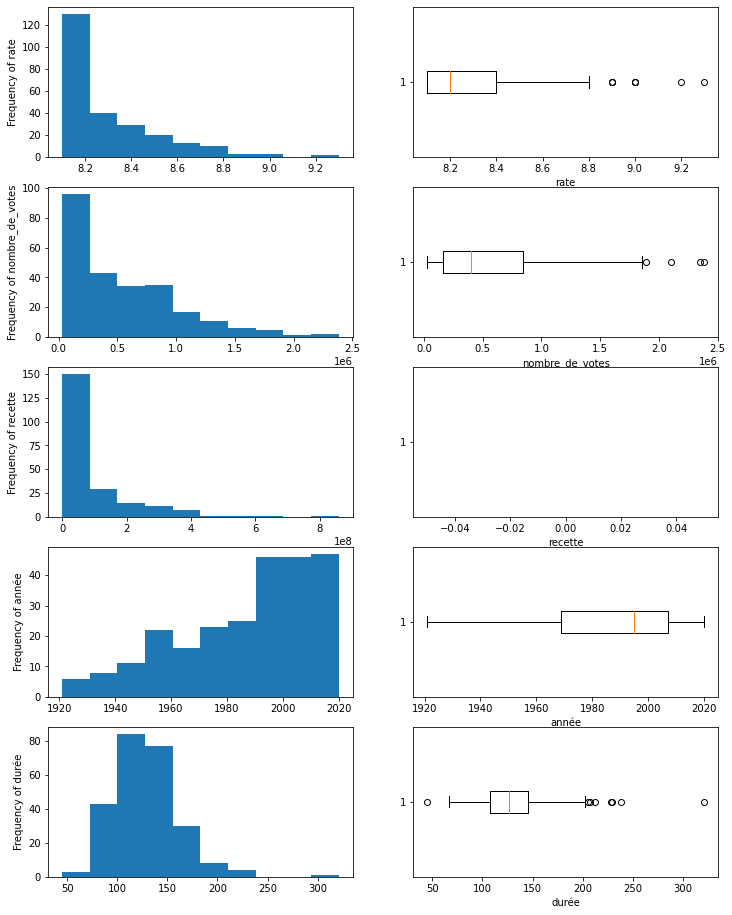

In [73]:
# plot histogram and boxplot (one-column plots)
import matplotlib.pylab as plt
fig,ax = plt.subplots(len(numerical_features), 2, figsize = (12, 16))

for i, feature in enumerate(numerical_features): 
    #plot the histogram
    ax[i][0].hist(IMDb_Top250[feature], bins = 10)
    ax[i][0].set_ylabel(f'Frequency of {feature}')

    ax[i][1].boxplot(IMDb_Top250[feature], vert=False)
    ax[i][1].set_xlabel(f'{feature}')
    

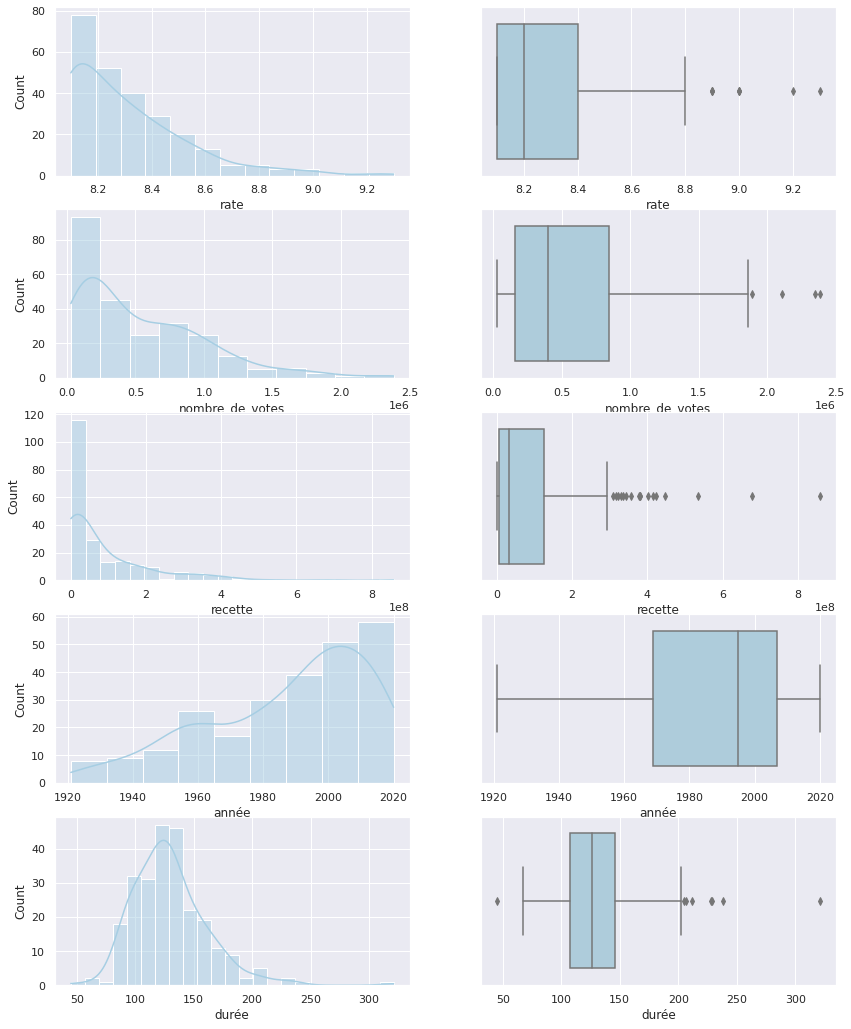

In [231]:
## make def
def plot_numeric_features(df, numerical_features_list):    
    import seaborn as sns
    sns.set() # Setting seaborn as default style even if use only matplotlib
    sns.set_palette("Paired") # set color palette
    fig, axes = plt.subplots(nrows=len(numerical_features_list), ncols=2, figsize = (14, 18))
    for i, feature in enumerate(numerical_features_list): 
        #sns.kdeplot(data = df, x=feature, fill=True, cut = 0, ax=axes[i,0])
        sns.histplot(data = df, x=feature, kde = True,   ax=axes[i,0])
        sns.boxplot(data = df, x=feature, ax=axes[i,1])  
    plt.show()
    
plot_numeric_features(IMDb_Top250, numerical_features)

## Repondre aux questions

Posez vous des questions et répondez-y en manipulant et visualisant la donnée via pandas, matplotlib ou searborn. 

Exemples : 
- Il y a t-il une correlation entre le nombre de stars et le recette ? 
- Quel est le nombre de film par année ? 
- Quel est le réalisateur le mieux noté ? etc...


<AxesSubplot:xlabel='rate', ylabel='recette'>

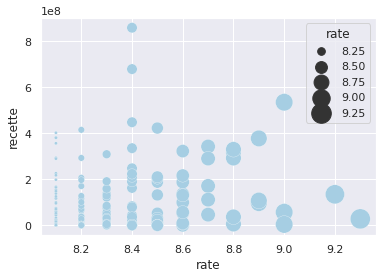

In [84]:
import seaborn as sns

sns.scatterplot(data=IMDb_Top250, x='rate', y='recette', size='rate', legend=True, sizes=(10, 400))

In [ ]:
['titre, ''rate', 'nombre_de_votes', 'recette', 'année', 'realisateur']

### Statistical values and most rated/voted/budgeted films

In [76]:
# Function to get statistics of all numerical features
def print_stat(df, numerical_features_list):
    for feature in numerical_features_list:
        print(
        """
        ** {} ** 
        ------------------------
        min:    {}  
        max:    {} 
        mean:   {:.1f} 
        median: {:.1f} 
        """.format(feature,
                   df[feature].min(), 
                   df[feature].max(), 
                   df[feature].mean(), 
                   df[feature].median()))
        
print_stat(IMDb_Top250, numerical_features)


        ** rate ** 
        ------------------------
        min:    8.1  
        max:    9.3 
        mean:   8.3 
        median: 8.2 
        

        ** nombre_de_votes ** 
        ------------------------
        min:    28038.0  
        max:    2384498.0 
        mean:   548191.9 
        median: 398484.5 
        

        ** recette ** 
        ------------------------
        min:    10177.0  
        max:    858373000.0 
        mean:   86861061.3 
        median: 31164078.0 
        

        ** année ** 
        ------------------------
        min:    1921  
        max:    2020 
        mean:   1987.3 
        median: 1995.0 
        

        ** durée ** 
        ------------------------
        min:    45.0  
        max:    321.0 
        mean:   129.6 
        median: 126.0 
        


In [78]:
def print_best_features(df, numeric_features):    
    for feature in numeric_features:
        df.sort_values(by = feature, ascending=False, inplace=True, ignore_index= True)
        année = df.loc[0,'année']
        titre = df.loc[0,'titre']
        realisateur = df.loc[0,'realisateur']
        max_feature = df.loc[0,feature]
        print("""
        {} ({}) de {} with highest {} = {:,} 
        """.format(titre, année, realisateur, feature, max_feature))
        

print_best_features(IMDb_Top250,['rate', 'nombre_de_votes', 'recette', 'durée'])


        Les Évadés (1994) de ['Frank Darabont'] with highest rate = 9.3 
        

        Les Évadés (1994) de ['Frank Darabont'] with highest nombre_de_votes = 2,384,498.0 
        

        Avengers: Endgame (2019) de ['Anthony Russo', 'Joe Russo'] with highest recette = 858,373,000.0 
        

        Gangs of Wasseypur (2012) de ['Anurag Kashyap'] with highest durée = 321.0 
        


### Recette & rate correlation?

- Mean recette by rate
- Highest/lowest recette by rate
- Highest/lowest num_votes by rate

<AxesSubplot:xlabel='rate', ylabel='recette'>

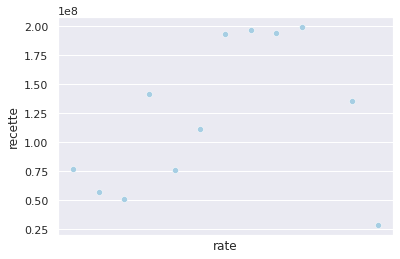

In [81]:
group_recette_rate = IMDb_Top250[['rate', 'recette']].groupby(by= 'rate', sort = True, as_index = False)
group_recette_rate
for rate in group_recette_rate['rate']:
    sns.boxplot()
df = group_recette_rate.recette.mean()
# df['max_recette'] = df_group_rate.recette.max()['recette']

# movies[['Titre', 'Score']].groupby('Score').count().plot(kind='bar', title='note des films par nombre de film')

sns.scatterplot(data = df, x = 'rate', y = 'recette' )

### Most rated / voted movies by decade?

In [114]:
#number of bins by decade
bin_min = IMDb_Top250.année.min()//10 
bin_max = IMDb_Top250.année.max()//10 +1
bins = [10* i - 1  for i in range(bin_min, bin_max+1)]

#group_names = [f'{int(b)}-x' for b in bins]
group_names = [int(b+1) for b in bins]
IMDb_Top250['decades'] = pd.cut(IMDb_Top250['année'], bins, labels=group_names[:-1], include_lowest=True )
#IMDb_Top250.head()
decades_rate = IMDb_Top250[['decades','rate', 'recette']].groupby(by='decades', sort = True, as_index = False).mean()
decades_rate
#sns.barplot(data = decades_rate, x='decades', y='rate')

,decades,rate,recette
0,1920,8.200000,2.361552e+06
1,1930,8.266667,3.547463e+07
2,1940,8.300000,2.346849e+06
3,1950,8.278261,1.433139e+07
4,1960,8.305556,1.729602e+07
5,1970,8.347368,7.864391e+07
6,1980,8.267857,8.021483e+07
7,1990,8.392683,9.934542e+07
8,2000,8.302128,1.047128e+08
9,2010,8.251020,1.424995e+08


In [116]:
IMDb_Top250[IMDb_Top250['decades']==2020]

,titre,année,rate,nombre_de_votes,recette,realisateur,durée,genre,decades
39,Hamilton,2020,8.5,63379.0,NaN,[Thomas Kail],160.0,"[Biography, Drama, History ]",2020
204,Soul,2020,8.1,232693.0,NaN,"[Pete Docter, Kemp Powers]",100.0,"[Animation, Adventure, Comedy ]",2020
217,The Father,2020,8.3,49184.0,NaN,[Florian Zeller],97.0,[Drama ],2020


In [159]:
IMDb_Top250[IMDb_Top250['recette'].isna()]

,titre,année,rate,nombre_de_votes,recette,realisateur,durée,genre,decades
0,Gangs of Wasseypur,2012,8.2,84334.0,NaN,[Anurag Kashyap],321.0,"[Action, Comedy, Crime ]",2010
11,Barry Lyndon,1975,8.1,152942.0,NaN,[Stanley Kubrick],185.0,"[Adventure, Drama, History ]",1970
15,Jugement à Nuremberg,1961,8.2,70919.0,NaN,[Stanley Kramer],179.0,"[Drama, War ]",1960
39,Hamilton,2020,8.5,63379.0,NaN,[Thomas Kail],160.0,"[Biography, Drama, History ]",2020
41,Le salaire de la peur,1953,8.1,55736.0,NaN,[Henri-Georges Clouzot],156.0,"[Adventure, Drama, Thriller ]",1950
66,Entre le ciel et l'enfer,1963,8.4,36338.0,NaN,[Akira Kurosawa],143.0,"[Crime, Drama, Mystery ]",1960
70,Requiem pour un massacre - Va et regarde,1985,8.3,62166.0,NaN,[Elem Klimov],142.0,"[Drama, Thriller, War ]",1980
84,Voyage à Tokyo,1953,8.2,54761.0,NaN,[Yasujirô Ozu],136.0,[Drama ],1950
91,Harakiri,1962,8.6,44618.0,NaN,[Masaki Kobayashi],133.0,"[Action, Drama, Mystery ]",1960
99,7. Kogustaki Mucize,2019,8.2,38484.0,NaN,[Mehmet Ada Öztekin],132.0,[Drama ],2010


### Realisateur with highest rate for all films - Most successful realisateurs

In [188]:
# the most rated realisateur + most expensive realisateure
from statistics import mean
realisateur_dict = {}
for index, realisateurs in zip(IMDb_Top250.index, IMDb_Top250['realisateur']):
    for r in realisateurs:
        if r in realisateur_dict.keys():
            for j, feature in enumerate(['rate','recette','durée']):
                realisateur_dict[r][j].append(float(IMDb_Top250.loc[index,feature]))            
        else:
            realisateur_dict[r] = [[],[],[]]
            for j, feature in enumerate(['rate','recette','durée']):
                realisateur_dict[r][j].append(float(IMDb_Top250.loc[index,feature])) 


headers = ["realisateur", 'mean_rate_all_movies','mean_recette_all_movies', 'mean_duree_all_movies', 'number_of movies']

realisateur_mean_scores = pd.DataFrame(columns=headers)

for key in realisateur_dict:
    row = []
    row.append(key)
    for i, col in enumerate(headers[1:-1]) :  
        mean_val = mean(realisateur_dict[key][i])
        row.append(mean_val)
    num = len(realisateur_dict[key][0])
    row.append(num)
    
    length = len(realisateur_mean_scores)
    realisateur_mean_scores.loc[length] = row

realisateur_mean_scores.head()    

,realisateur,mean_rate_all_movies,mean_recette_all_movies,mean_duree_all_movies,number_of movies
0,Anurag Kashyap,8.200,NaN,321.00,1
1,Victor Fleming,8.100,198676459.0,238.00,1
2,George Cukor,8.100,198676459.0,238.00,1
3,Sam Wood,8.100,198676459.0,238.00,1
4,Sergio Leone,8.475,7935754.0,171.75,4


In [229]:
## Plot top 20 with the highest rate/recette/movie_duration

def barplot_top_N(df, label, features, n_top):
    """
    Function to make barblot of the top N realisateur with the highest value of feature
    df = data frame
    features = list of names of columns 
    n_top = number of names in final barblot    
    """
    num_rows = len(features)//2
    if len(features)%2 ==1 : num_rows += 1
    f, axes = plt.subplots(nrows = num_rows, ncols = 2, figsize=(12, 20))
    for i, feature in enumerate(features):
        df_sorted = df.sort_values(by=feature,
                                   ascending=False,
                                   inplace=False,
                                   ignore_index=True)
        sns.barplot(data=df_sorted.head(n_top),
                    y=label,
                    x=feature,
                    ax=axes[i//2, i%2])
        min_rate = df_sorted[feature].min()
        max_rate = df_sorted[feature].max()
        # Add a legend and informative axis label
        axes[i//2, i%2].set(xlim=(min_rate, max_rate * 1.01),
                       xlabel=feature)  #, ylabel="",)
        sns.despine(left=True, bottom=True, ax=axes[i//2,i%2 ])
        axes[i//2, i%2].set_title(f"Top {n_top} realisateur with the highest {feature} ", size = 12)
    plt.subplots_adjust()
    plt.tight_layout()
    

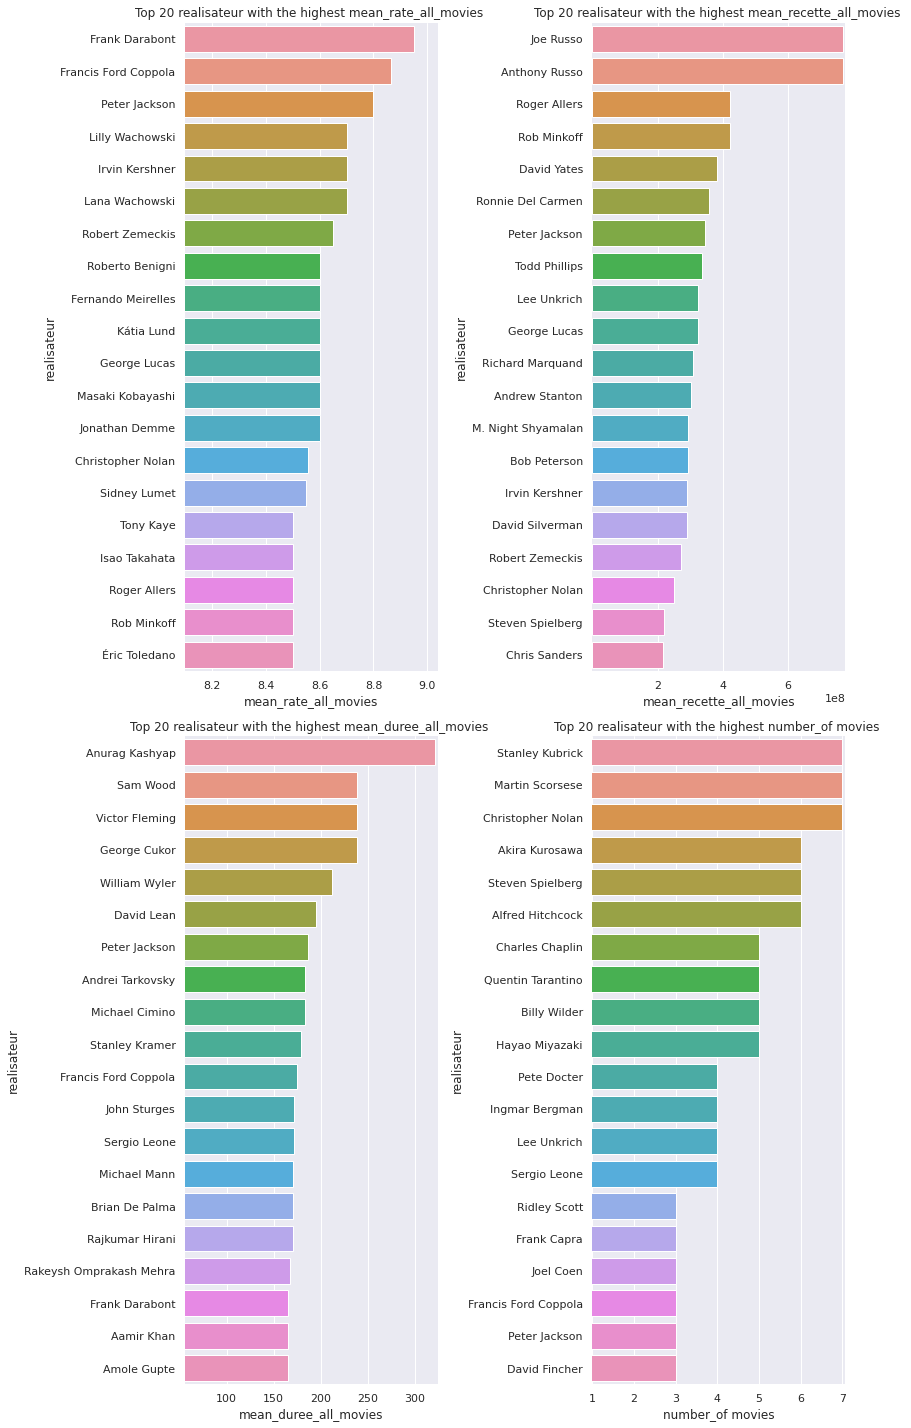

In [230]:
barplot_top_N(realisateur_mean_scores, 'realisateur', headers[1:], 20)

In [132]:
d= {'a': [1], 'b': [2,3]}

#print('a' in d.keys())

for index, r in zip(IMDb_Top250.index, IMDb_Top250['realisateur']):
    print(IMDb_Top250.loc[index, 'rate'])

8.2
8.1
8.4
8.3
8.1
8.6
8.1
9.0
8.9
8.9
8.6
8.1
8.1
8.4
8.2
8.2
8.7
8.3
8.8
8.2
9.2
8.2
8.3
8.4
8.2
8.6
8.6
8.1
8.4
8.4
8.5
8.4
8.2
8.2
8.2
8.8
8.1
8.4
8.3
8.5
8.2
8.1
8.2
8.5
8.5
8.1
8.9
8.3
8.1
8.3
9.0
8.1
8.5
8.5
8.3
8.1
8.3
8.4
8.8
8.1
8.4
8.4
8.7
8.1
8.1
8.3
8.4
8.2
9.3
8.8
8.3
8.1
8.2
8.2
8.2
8.1
8.8
8.2
8.2
8.2
8.4
8.3
8.1
8.5
8.2
8.3
8.7
8.3
8.2
8.4
8.1
8.6
8.1
8.7
8.2
8.2
8.2
8.6
8.1
8.2
8.3
8.3
8.1
8.6
8.5
8.2
8.1
8.2
8.1
8.1
8.6
8.1
8.3
8.2
8.1
8.2
8.2
8.1
8.3
8.1
8.1
8.2
8.1
8.6
8.3
8.4
8.2
8.6
8.4
8.3
8.7
8.1
8.3
8.1
8.1
8.3
8.1
8.3
8.1
8.3
8.4
8.1
8.6
8.2
8.1
8.2
8.1
8.4
8.1
8.1
8.1
8.5
8.3
8.3
8.2
8.1
8.2
8.6
8.1
8.3
8.1
8.4
8.1
8.1
8.4
8.5
8.1
8.3
8.6
8.4
8.3
8.4
8.1
8.2
8.4
8.3
8.5
8.4
8.1
8.5
8.2
8.1
8.4
8.1
8.5
8.1
8.3
8.1
8.3
8.2
8.5
8.4
8.5
8.2
8.4
8.1
8.3
8.1
8.1
8.2
8.3
8.3
8.5
8.1
8.1
8.1
8.2
8.1
8.3
8.1
8.1
8.2
8.1
8.1
8.4
8.1
8.1
8.3
8.2
8.2
9.0
8.2
8.2
8.4
8.1
8.1
8.1
8.1
8.1
8.1
8.2
8.2
8.3
8.3
8.5
8.1
8.2
8.5
8.4
8.5
8.2
8.5
8.1
8.2
8.1
8.3
8.1
8.3
8.1
8.2


### Most sucsessful & frequent & with highest budget realisateur? 

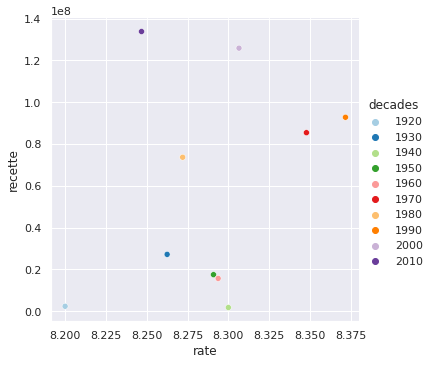

In [103]:
sns.relplot(data = decades_rate, x="rate", y="recette", hue="decades");

## Architecturer son code en utilisant des methodes